#  <center>MOD 9.5 - Réseaux informatiques</center>
## <center style="color: #06A">BE 3 - Le protocole HTTP</center>

<center>__.......... MOREAU Maxime & JANATI Mehdi ..........__</center>

<h3 style="font-size:150%;color:white;background-color: #7fb2d4;padding:0.2em">A - Informations générales</h3>

<h4 style="font-size:150%;color:#06A;margin:1em 0 1.33em">1. Déroulement de la séance.</h4>

Comme précédemment, le travail sera à effectuer par binôme. Le compte-rendu doit être rédigé
en complétant directement le présent notebook qui devra être déposé sur moodle une fois le travail terminé.

Avant de déposer le résultat de votre travail, merci de __mentionner vos noms au sein du document__, puis au moment du dépôt de bien vouloir nommer le fichier sous la forme :

<code>CR &lt;nom eleve 1> - &lt;nom eleve 2> - &lt;N° BE></code> 

<h4 style="font-size:150%;color:#06A;margin-bottom:1.33em">2. Objectif du travail demandé.</h4>

L'objectif du BE consiste à envoyer des requêtes HTTP vers des ressources diverses, de relever les réponses obtenues et de commenter ce que vous observez.

Pour cela, les fonctions <code>http_request</code> et <code>https_request</code> ci-dessous vont vous aider à envoyer une requête HTTP (resp. HTTPS) en Python depuis le notebook et à afficher le résultat obtenu :

In [18]:
import html
import http.client
from IPython.display import display, HTML, Image

def http_request(method, server, path, body=None, headers={}, port=80, silent=False):
    conn = http.client.HTTPConnection(server, port)
    resp = send_request(conn, method, path, body, headers)
    body = resp.read()
    if silent:
        return (resp,body)
    else:
        display_response(resp,body)

def https_request(method, server, path, body=None, headers={}, port=443, silent=False):
    conn = http.client.HTTPSConnection(server, port)
    resp = send_request(conn, method, path, body, headers)
    body = resp.read()
    if silent:
        return (resp,body)
    else:
        display_response(resp,body)

def send_request(conn, method, path, body=None, headers={}):
    conn.request(method, path, body, headers)
    return conn.getresponse()

def display_response(response,body):
    display_status_line(response)
    display_headers(response.headers)
    contentType = response.getheader('Content-Type')
    if contentType:
        if contentType.startswith('text') or contentType.startswith('application/json') or 'xml' in contentType:
            display_body(body.decode('UTF-8'), contentType)
        elif contentType.startswith('image'):
            display_body(body, contentType)
        else:
            display_error('Le notebook ne sait pas afficher le type de contenu {}'.format(contentType))
    return body


def display_error(msg):
    display_html(
        '<i style="margin-top:-0.4em; font-family:Consolas,monospace; ' +\
        'display:inline-block; margin-top:10px; color:#ccc">{}</i>',
        msg)

def display_status_line(response):
    display_html(
        "<code style='font-family:Consolas,monospace; display:block; margin-top: 5px; " +\
        "border-bottom:1px solid #ccc'><span style='font-weight:bold;color:#008'>{}</span> - {}</code>",
        response.status, response.reason)

def display_headers(headers):
    for h in headers:
        display_header(h,headers[h])

def display_header(header,value):
    display_html(
        "<code style='display:block; margin-top:-0.7em; font-family:Consolas,monospace'><b>{}:</b> {}</code>",
        header, value)
    
def display_body(body, contentType):
    preformatted = "<pre style='font-family:Consolas,monospace; padding:5px; " + \
        "border: 1px solid #ccc; border-radius:5px; box-shadow: 5px 5px 5px #ccc; " + \
        "margin:5px 0 10px 0; display: inline-block; min-width: 50%'>{}</pre>"
    freeformat = "<div style='padding:5px; border: 1px solid #ccc; border-radius:5px; " + \
        "box-shadow: 5px 5px 5px #ccc; margin:5px 0 10px 0; display: inline-block; " + \
        "min-width: 50%'>{}</div>"
    if ( len(body) ):
        if ( contentType.startswith('application/json') ) :
            display_html(preformatted, body)
        elif ( contentType.startswith('text/html') ) :
            display_html(freeformat, body)
        elif ( contentType == 'image/svg+xml') :
            display_html(freeformat, body)
        elif ( contentType.startswith('text/plain') ) :
            display_html(preformatted, html.escape(body))
        elif ( contentType.startswith('image') ) :
            display(Image(body))
    
def display_html(fmt,*args):
    display(HTML(fmt.format(*args)))

Voici comment utiliser la fonction <code>http_request()</code> pour effectuer une requête GET vers l'adresse http://httpbin.org/robots.txt :

In [19]:
http_request('GET','httpbin.org','/robots.txt')

Et voici comment effectuer une requête POST avec un corps :

In [20]:
https_request('POST','mod95-be3.onrender.com','/message', headers={
    'Content-Type': 'application/x-www-form-urlencoded'
}, body="pr%C3%A9nom=Raymond&nom=Deubaze&message=Bonjour D%C3%A9d%C3%A9+!")

<h3 style="font-size:150%;color:white;background-color:#7fb2d4;padding:0.2em">B - Travail à effectuer</h3>

<h4 style="font-size:150%;color:#06A;margin:1em 0 1.33em">1. Exemples de requêtes HTTP</h4>

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[1.1]__ - Effectuer une requête vers la ressource <a href="https://mod95-be3.onrender.com/hello.html">hello.html</a>.
</div>

In [21]:
https_request('GET', 'mod95-be3.onrender.com','/hello.html')

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[1.2]__ - Comment peut-on obtenir uniquement les entêtes de cette même ressource ?
</div>

In [22]:
https_request('HEAD','mod95-be3.onrender.com','/hello.html' )

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[1.3]__ - Expliquer à quoi sert chacune des entêtes de la réponse que vous obtenez.
</div>

Date : Indique la date et l’heure exactes de la réponse du serveur. Utile pour la gestion des caches et le débogage.

Content-Type : Précise le format du contenu et son encodage. Aide le client à interpréter correctement la réponse.

Content-Length : Indique la taille du contenu de la réponse en octets, permettant au client de savoir combien de données attendre.

Connection : Informe si la connexion TCP reste ouverte ou non.

Location : Spécifie la nouvelle URL où accéder à la ressource. Obligatoire dans une réponse 301.

CF-Ray : Un identifiant unique pour tracer la requête à travers le réseau Cloudflare.

CF-Cache-Status : Indique si la réponse est mise en cache par Cloudflare.

Vary : Informe que le contenu peut changer en fonction de l’en-tête Accept-Encoding.

Server : Identifie le serveur ou la plateforme qui a traité la requête.

alt-svc : Informe que HTTP/3 est disponible en alternative, permettant des connexions plus rapides et sécurisées.


<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[1.4]__ - Observer maintenant les entêtes obtenues en accédant à <a href="http://dmolinarius.github.io/demofiles/mod-95/be-http/hello.html">hello.html</a>.<br>
Il s'agit d'un document ayant le même contenu que le précédent, mais hébergé sur un serveur différent.
</div>

In [23]:
http_request('HEAD', 'dmolinarius.github.io','/demofiles/mod-95/be-http/hello.html')

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[1.5]__ - Expliquer à quoi servent chacune des nouvelles entêtes de la réponse que vous obtenez.<br>
A quoi correspondent les entêtes dont le nom commence par X- ?
</div>
<!-- cf. https://stackoverflow.com/questions/3561381/custom-http-headers-naming-conventions -->

Content-Length : Taille de la réponse en octets.

permissions-policy : Désactive le suivi publicitaire.

Access-Control-Allow-Origin : Autorise les requêtes cross-origin.

expires : Date d’expiration de la ressource en cache.

x-proxy-cache : État du cache proxy.

X-GitHub-Request-Id : Identifiant unique pour le suivi GitHub.

Accept-Ranges : Permet des requêtes partielles.

Age : Temps écoulé depuis la mise en cache.

Via : Indique les intermédiaires ayant traité la requête.

X-Served-By : Serveur ayant servi la requête.

X-Cache/X-Cache-Hits : État du cache.

X-Timer : Durée de traitement de la requête.

X-Fastly-Request-ID : Suivi unique par le CDN Fastly.


Les "X- " marquent des en-têtes personnalisées ou internes pour le suivi, débogage ou gestion. Non standardisées mais utiles pour l’infrastructure.

<h4 style="font-size:150%;color:#06a;margin-bottom:1.33em;border-top:3px solid #7fb2d4; padding-top:0.5em">2. Divers types de ressources.</h4>

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[2.1]__ - Effectuer maintenant une requête vers la ressource
<a href="https://mod95-be3.onrender.com/hello.txt">hello.txt</a> et observer les entêtes obtenues.<br>
Comparer les codes source des deux documents, puis expliciter l'ensemble des similitudes et des différences avec les entêtes correspondant à
<a href="https://mod95-be3.onrender.com/hello.html">hello.html</a>.
</div>

In [24]:
https_request('GET', 'mod95-be3.onrender.com','/hello.txt')


In [25]:
https_request('GET', 'mod95-be3.onrender.com','/hello.html')

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[2.2]__ - Visualiser ces deux ressources à l'aide d'un navigateur et noter la différence (s'il n'y en a pas, changer de navigateur). Commenter.
</div>

On observe que les contenus des ressources diffèrent par leur type. Pour la requête GET sur hello.txt, la réponse est de type text/plain, indiquant un affichage en texte brut sans mise en forme. En revanche, pour la requête GET sur hello.html, le contenu est de type text/html, ce qui permet une stylisation et un rendu formaté dans le navigateur.

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[2.3]__ - Effectuer les requêtes permettant d'obtenir les ressources
<a href="https://mod95-be3.onrender.com/file1.html">file1.html</a>,
<a href="https://mod95-be3.onrender.com/file2.html">file2.html</a>,
<a href="https://mod95-be3.onrender.com/file3.html">file3.html</a>,
 et essayez de les ouvrir directement dans votre navigateur.<br>
Commenter ce que vous observez et les réponses obtenues, en indiquant notamment quel est le type respectif de chacune de ces ressources et comment les navigateurs les affichent. Préciser comment fait le navigateur pour savoir comment afficher chacune de ces ressources, et donner votre avis sur la pertinence de la démarche qui consisterait à essayer d'inférer le type d'une ressource à partir de son URL.

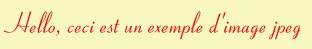

In [26]:
https_request('GET', 'mod95-be3.onrender.com', '/file1.html')

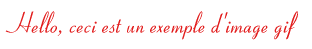

In [27]:
https_request('GET', 'mod95-be3.onrender.com', '/file2.html')

In [28]:
https_request('GET', 'mod95-be3.onrender.com', '/file3.html')

Type de ressource :
- file1.html : image/jpeg
- file2.html : image/gif
- file3.html : application/pdf

Le navigateur interprète les ressources en fonction de leur type réel, indiqué par l’en-tête Content-Type. Comme illustré ici, notamment avec file3.html, l’URL ne correspond pas nécessairement au type réel de la ressource.

<h4 style="font-size:150%;color:#06A;margin-bottom:1.33em;border-top:3px solid #7fb2d4; padding-top:0.5em">3. Requêtes conditionnelles.</h4>

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[3.1]__ - Afin de faciliter la gestion des caches, HTTP/1.0 possède la directive Last-Modified, tandis que HTTP/1.1 a introduit la notion d'Etag. Noter la date de dernière modification et l'Etag de la ressource
<a href="https://mod95-be3.onrender.com/hello.html">hello.html</a>.
</div>

In [29]:
https_request('HEAD', 'mod95-be3.onrender.com','/hello.html')

Dernière modification : Wed, 11 Dec 2024 15:05:56 GMT

ETag : W/"b6-187dd542520

In [30]:
header = {"If-Modified-Since" : "Tue, 02 May 2023 16:38:12 GMT"}
https_request('GET', 'mod95-be3.onrender.com','/hello.html', headers = header)

In [31]:
headers = {"If-modifief-since" : "Mon, 01 May 2024 16:38:12 GMT"}
https_request('GET', 'mod95-be3.onrender.com','/hello.html', headers= headers)

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[3.2]__ - Effectuer une requête GET conditionnelle vers cette même ressource, dont la directive If-Modified-Since correspond à la date de dernière modification du document. En effectuer une autre avec une date antérieure. Commenter les résultats observés et conclure sur le fonctionnement et l'utilité de cette directive.
</div>

La première requete inclus une directive If-Modified-Since dont la valeur correspond à la date exacte de la dernière modifictation de la ressource. Dès lors, comme la ressource n'a pas été modifiée depuis, le serveur renvoie un statut 304 "Not modified" sans retransmettre la ressource pour signaler au client qu'il peut utilisé la ressource cachée. 

La deuxième requête inclus elle aussi une directive If-Modified-Since dont la valeur est une date antérieur à la dernière modification de la ressource. Comme la ressource a été modifiée depuis, le serveur renvoie un statut 200 OK avec la ressource pour que le client puisse actualiser son cache. 

Cette directive permet donc d'économiser de la bande passante en évitant le téléchargement systématique des ressources.

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[3.3]__ - Effectuer le même exercice avec une requête conditionnelle basée sur l'Etag. A votre avis, pourquoi y a-t-il eu cette nouvelle possibilité en HTTP/1.1 ?
</div>

In [16]:
header = {"If-None-Match" : "W/\"b6-187dd542520\""}
https_request('GET', 'mod95-be3.onrender.com','/hello.html', headers = header)

In [17]:
headers = {"If-None-Match" : "W/\"b6-187dd542220\""}
https_request('GET', 'mod95-be3.onrender.com','/hello.html', headers= headers)

L'Etag a été introduit principalement pour répondre à des problèmes de synchronisation d'horloge entre le client et le serveur, mais aussi pour résoudre les problèmes de modifications rapides qui peuvent survenir avec l'horodatages des ressources.

<h4 style="font-size:150%;color:#06A;margin-bottom:1.33em;border-top:3px solid #7fb2d4; padding-top:0.5em">4. Redirections.</h4>

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[4.1]__ - Examiner la réponse obtenue lors d'une requête vers 
<a href="https://mod95-be3.onrender.com/moved">cette ressource</a> et décrire le comportement
d'un navigateur lorsqu'il reçoit ce type de réponse.<br>
<em>-- attention, il y a éventuellement un piège --</em>
</div>

In [18]:
https_request('GET', 'mod95-be3.onrender.com','/moved')

Ici la réponse du serveur du statut 301 - Moved Permanently, ce qui signifie au client de rediriger la requête GET vers l'URL : Http://www.ec-lyon.fr. Dès lors, après avoir ouvert l'URL initial, le navigateur se redirige imédiatement vers cet URL.

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[4.2]__ - Essayer maintenant
<a href="https://mod95-be3.onrender.com/perm">cette nouvelle ressource</a>. Quelle sont les différences avec la précédente ? Consulter par exemple la <a href="https://en.wikipedia.org/wiki/List_of_HTTP_status_codes#4xx_Client_errors">liste des statuts HTTP</a> et préciser en quoi le comportement attendu des clients est différent.
</div>

In [19]:
https_request('GET', 'mod95-be3.onrender.com','/perm')

Le client reçoit une réponse dont le statut est : 308 - Permanent Redirect. Pour une requête GET il n'y a aucune différence côté client, on est également redirigé vers l'URL http://ec-lyon.fr.

La différence entre le statut 301 et 308 est que le 301 permet de changer la méthode HTTP lors de la redirection (par exemple, POST → GET), tandis que le 308 garantit que la méthode HTTP reste inchangée.

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[4.3]__ - Ce type de redirection est utilisé par les raccourcisseurs d'URLs. Vérifier ceci en envoyant une requête
vers la ressource <a href="http://bit.ly/2Oz8wbC">http://bit.ly/2Oz8wbC</a>. Commenter le résultat obtenu et expliquer pourquoi ce type de réponse est approprié pour ces services.
</div>

In [20]:
https_request('GET', 'bit.ly','/2Oz8wbC')

Le serveur de Bitly renvoie une réponse avec une redirection 301 - Moved Permanently, l’en-tête Location pointe vers l’URL: http://ec-lyon.fr

Ce mécanisme de redirection est essentiel pour ces services, car il garantit à la fois la simplicité d’utilisation des URL courtes et la robustesse de leur gestion.

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[4.4]__ - Voici encore
<a href="https://mod95-be3.onrender.com/found">une ressource</a> et
<a href="https://mod95-be3.onrender.com/temp">une dernière</a>
effectuant chacune une redirection. En vous référant encore une fois à la documentation, expliquer les différences de comportement attendues de la part d'un client recevant chacune de ces réponses, l'une par rapport à l'autre, puis par rapport aux deux codes de redirection observés précédemment.
</div>

In [21]:
https_request('GET', 'mod95-be3.onrender.com','/found')

In [22]:
https_request('GET', 'mod95-be3.onrender.com','/temp')

Le 301 permet de modifier la méthode lors de la redirection, tandis que le 307 garantit que la méthode reste inchangée. En général,le 307 est conçu pour des redirections temporaires où la méthode et les données doivent être préservées.

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[4.5]__ - Ce type de redirection est utilisé par les portails captifs. Vérifier ceci en envoyant une requête
vers la ressource <a href="https://campus.ec-lyon.fr">https://campus.ec-lyon.fr</a>. Commenter le résultat obtenu et expliquer pourquoi ce type de réponse est approprié pour ces services.
</div>

In [23]:
https_request('GET', 'campus.ec-lyon.fr', path="")

Le serveur renvoie une redirection temporaire (302) vers une page d’authentification CAS pour gérer l’accès sécurisé à la ressource demandée.

Le client est redirigé vers une URL temporaire avec un coockie de session sécurisé.

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[4.6]__ - Voici un dernier exemple : <a href="http://mod95-be3.onrender.com/hello.html">http://mod95-be3.onrender.com/hello.html</a>. Commenter.
</div>

In [24]:
https_request('GET', 'mod95-be3.onrender.com','/hello.html')

Il n’y a pas de redirection ici. Le code 200 - OK indique que la ressource demandée a été trouvée et est renvoyée directement au client.

<h4 style="font-size:150%;color:#06A;margin-bottom:1.33em;border-top:3px solid #7fb2d4; padding-top:0.5em">5. Authentification.</h4>

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[5.1]__ - La ressource <a href="https://mod95-be3.onrender.com/user.html">user.html</a>
est protégée avec un nom d'utilisateur et un mot de passe. Quelles sont les informations renvoyées par le serveur permettant au navigateur de gérer cette situation ? Comment réagit le navigateur ?
</div>

In [25]:
https_request('GET', 'mod95-be3.onrender.com','/user.html')

Le serveur renvoie un statut 401 Unauthorized avec l’en-tête WWW-Authenticate spécifiant le type d’authentification requise et le domaine protégé (realm="BE-HTTP"). Le navigateur affiche un pop up à pour fournir l'identifiant et le mot de passe de connexion pour pouvoir accéder à la ressource. 

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[5.2]__ - Le nom d'utilisateur et le mot de passe permettant d'accéder à la ressource
<a href="https://mod95-be3.onrender.com/user.html">user.html</a> sont respectivement
<code>be-http</code> et <code>cool!</code>. Indiquer quelle est la directive à ajouter à la requête pour accéder à cette ressource, et comment est construite la valeur transmise au serveur.

Pour acceder à la ressource il est nécessaire de rajouter l'en-tête <code>Authorization</code>.
La valeur de l'entête doit être de la forme : 


<code>Authorization :</code> <code>type_auth</code> encode_base_64(<code>type_auth id:mdp</code>)

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[5.3]__ -  Le module Python nommé base64 permet d'encoder des chaînes de caractères en base64. Après vous être documenté sur la façon d'utiliser ce module, déterminer quelle est l'entête exacte permettant au navigateur d'obtenir la ressource protégée, et vérifier à l'aide d'une requête que cela fonctionne.

In [26]:
import base64

id = "be-http"
password = "cool!"
key = id + ":" + password

encoded_key = base64.b64encode(key.encode()).decode()
encoded_key

'YmUtaHR0cDpjb29sIQ=='

In [27]:
header = {"Authorization" : "Basic " + encoded_key}
https_request('GET', 'mod95-be3.onrender.com','/user.html', headers=header )

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[5.4]__ - Donner votre avis quant au niveau de sécurité apporté par la méthode d'authentification Basic, et des exemples de contexte dans lequel il est tout de même acceptable de l'utiliser.
</div>

L'authentification Basic est peu sécurisée car les identifiants de connexions sont encodés en Base64. Dès lors, si la communication entre le serveur et le client est n'est pas chiffrée, il est possible d'intertecpter les identifiants et de les décoder facilement. 

Il est acceptable d'utiliser cette méthode d'authentification dès lors que les communications sont chiffrées, ou pour un usage domestique et privé. 

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[5.5]__ - Le lien <a href="https://mod95-be3.onrender.com/401/basic">logout</a>
permet de se déconnecter et oblige l'utilisateur à fournir à nouveau le mot de passe lors de l'accès suivant
à la ressource <a href="https://mod95-be3.onrender.com/user.html">user.html</a>.
Expliquer ce que fait le serveur pour arriver à ce résultat.
</div>

In [28]:
https_request('GET', 'mod95-be3.onrender.com','/401/basic')

Le serveur renvoie une réponse 401 - Unauthorized avec l'en-tête <code> WWW-Authenticate</code> lors de l’accès au lien de logout, dès lors le client arrête automatiquement d'envoyer les identifiants dans les requêtes.

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[5.6]__ - La ressource <a href="https://mod95-be3.onrender.com/digest.html">digest.html</a> est protégée avec la méthode d'authentification Digest. Le nom d'utilisateur et le mot de passe sont les mêmes que précédemment. Décrire les nouveaux éléments dans la réponse du serveur.
</div>

In [29]:
https_request('GET', 'mod95-be3.onrender.com','/digest.html')

Le serveur renvoie un statut 401 - Authorization Required, avec de nouvelles informations dans l'en-tête <code>WWW-Authenticate</code> : Digest realm="BE-HTTP", nonce="2d597bb16b47d3c487f11d0360ed63d1"

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[5.7]__ - Expliquer comment construire la requête permettant d'accéder à la ressource
<a href="https://mod95-be3.onrender.com/digest.html">digest.html</a>.

<b>Les informations envoyées par le serveur :</b>

<code>realm</code> : identifie la portée de la protection (par exemple, le domaine ou la ressource protégée).

<code>nonce</code> : valeur unique générée par le serveur pour sécuriser l’échange et empêcher les attaques par rejeu.

<b>Les identifiants de connexion et l’URI de la ressource :</b>

Le nom d’utilisateur et le mot de passe fournis par l’utilisateur.

L’URI de la ressource demandée (par exemple, /digest.html).

<b>Les données calculées par le client :</b>

<code>HA1</code> : hash MD5 du triplet username:realm:password.

<code>HA2</code> : hash MD5 du triplet method:uri (par exemple, GET:/digest.html).

<code>response</code> : hash final calculé à partir des informations précédentes, incluant nonce.

In [69]:
import hashlib
import re

username = "be-http"
password = "cool!"
method='GET'
uri = "/digest.html"
cnonce = "0a4f113b"
resp, body = https_request('GET', 'mod95-be3.onrender.com','/digest.html', silent=True)
resp.msg

realm_match = re.search(r'realm="([^"]+)"', str(resp.msg))
realm = realm_match.group(1) if realm_match else None
nonce_match = re.search(r'nonce="([^"]+)"', str(resp.msg))
nonce = nonce_match.group(1) if nonce_match else None
nc = nonce
H1_string = f"{username}:{realm}:{password}"
H1 = hashlib.md5(H1_string.encode()).hexdigest()
H2_string = f"{method}:{uri}"
H2 = hashlib.md5(H2_string.encode()).hexdigest()


response_string = f"{H1}:{nonce}:{H2}"
response = hashlib.md5(response_string.encode()).hexdigest()

auth_header = (
    f'Digest username="{username}", realm="{realm}", nonce="{nonce}", uri="{uri}", nc={nc}, cnonce="{cnonce}", response="{response}"'
)


header = {"Authorization": auth_header}

https_request('GET', server="mod95-be3.onrender.com", path = "/digest.html", headers=header)

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[5.9]__ - __Remarque:__ le nonce peut être généré par le serveur à sa convenance, en fonction du client (adresse IP), de la date de la requête (durée limitée), de l'URI de la ressource (portée limitée) et être vérifié lors de toute requête ultérieure.
<p>C'est le cas du serveur recevant les requêtes précédentes qui crée des nonces dont la durée de validité est de 1 minute. C'est bien sûr trop court pour un serveur de documents statiques, et éventuellement trop long pour une API. Mais cela permet de jouer...
<p>Vérifier qu'un nonce arbitraire ainsi qu'un nonce dont la durée de vie est dépassée ne sont pas acceptés.
</div>

Nonce durée de vie dépassée

In [70]:

https_request('GET', server="mod95-be3.onrender.com", path = "/digest.html", headers=header)

nonce arbitraire : 

In [74]:
nc = "f5d5cad8df18a2339cba765026a607f"
H1_string = f"{username}:{realm}:{password}"
H1 = hashlib.md5(H1_string.encode()).hexdigest()
H2_string = f"{method}:{uri}"
H2 = hashlib.md5(H2_string.encode()).hexdigest()
response_string = f"{H1}:{nonce}:{H2}"
response = hashlib.md5(response_string.encode()).hexdigest()
auth_header = (
    f'Digest username="{username}", realm="{realm}", nonce="{nonce}", uri="{uri}", nc={nc}, cnonce="{cnonce}", response="{response}"'
)
header = {"Authorization": auth_header}
https_request('GET', server="mod95-be3.onrender.com", path = "/digest.html", headers=header)

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[5.10]__ - Conclure sur la méthode Digest, avec ses avantages et ses inconvénients (s'il y en a), par rapport notamment à la méthode Basic.
</div>

... vos conclusions ici

<h4 style="font-size:150%;color:#06A;margin-bottom:1.33em;border-top:3px solid #7fb2d4; padding-top:0.5em">6. Service REST</h4>

<p>REST est un concept d'architecture permettant de développer des services web
<a href="https://en.wikipedia.org/wiki/Representational_state_transfer#Relationship_between_URL_and_HTTP_methods">basés sur les méthodes HTTP</a> pour créer, consulter, modifier ou supprimer des informations <em>(CRUD - Create, Read, Update, Delete)</em>.

<p>Le service
<a href="https://mod95-be3.onrender.com/todolist">todolist</a> implémente ce type d'architecture, pour créer une TODO_list, lire son contenu, la modifier ou la supprimer. Les questions suivantes permettront de disséquer son fonctionnement.

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[6.1]__ - &Eacute;mettre une requête POST vers ce service et en déduire le type de contenu attendu pour créer une liste.
</div>

In [2]:
server = 'mod95-be3.onrender.com'
path = '/todolist'
https_request('POST', server=server, path=path)

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[6.2]__ - &Eacute;mettre une requête POST vers ce service avec le premier type de contenu supporté, et en déduire l'information manquante pour créer une liste.
</div>

In [3]:
header = {'Content-Type' : 'application/x-www-form-urlencoded'}
https_request('POST', server=server, path=path, headers=header)

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[6.3]__ - Se documenter au sujet du premier type de contenu demandé, puis formuler une requête POST vers ce service avec les informations nécessaires formattées à l'aide de ce type de contenu pour créer une TODO_list comportant une tâche.
</div>

In [4]:
import urllib.parse
dict = { "value" : "World"}
dict = urllib.parse.urlencode(dict)
print(dict)
header = {'Content-Type' : 'application/x-www-form-urlencoded'}
https_request('POST', server=server, path=path, body="value=hello", headers=header)

value=World


[... mettre ici une référence vers la documentation trouvée](https://developer.mozilla.org/en-US/docs/Web/HTTP/Methods/POST)

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[6.4]__ - Essayer avec la tâche "Acheter du café". Sauf exception, il y aura un problème avec les caractères accentués.
Plutôt que de bricoler à la main pour résoudre le problème, consulter la documentation de
<a href="https://docs.python.org/3/library/urllib.parse.html#urllib.parse.urlencode">urllib.parse.urlencode</a> et
reformuler une requête permettant de créer une tâche dont le libellé comporte des caractères accentués. Indiquer comment ces caractères sont encodés.
</div>

In [7]:
header = {'Content-Type' : 'application/x-www-form-urlencoded'}
https_request('POST', server=server, path=path, body="value=Acheter+du+café", headers=header)

In [8]:
header = {'Content-Type' : 'application/x-www-form-urlencoded'}
https_request('POST', server=server, path=path, body="value=Acheter+du+caf%C3%A9", headers=header)

Dans l'encodage url, les caractères alphanumériques restent inchangés. Les caractère réservés (!, /, $) sont encodé en hexadécimal précédé d'un signe %. Les non ASCII (é,à, etc), sont encodé en hexadécimal avec % après avoir été convertis en UTF-8.

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[6.5]__ - De fait, le service utilisé permet de créer une TODO_list avec plusieurs tâches. Relire la documentation de
<a href="https://docs.python.org/3/library/urllib.parse.html#urllib.parse.urlencode">urllib.parse.urlencode</a>
pour découvrir comment spécifier une variable dont la valeur est une liste, puis créer une TODO_list comportant plusieurs tâches.
</div>

...indiquer comment spécifier une variable prenant plusieurs valeurs (i.e. une liste)

In [9]:
import urllib.parse

data = [
    ("value", "Se lever tôt"),
    ("value", "Acheter du café"),
    ("value", "Réviser ses partiels")
]

data = urllib.parse.urlencode(data)
header = {'Content-Type' : 'application/x-www-form-urlencoded'}
https_request('POST', server=server, path=path, body= data, headers=header)

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[6.6]__ - Le service utilisé accepte également les requêtes au format 
<a href="https://www.json.org/">JSON</a>. Utiliser le module
<a href="https://docs.python.org/3/library/json.html">json</a> pour émettre une requête avec un corps en JSON permettant
de créer une TODO_list comportant une ou plusieurs tâches. Ne pas pas oublier de tester des tâches comportant des caractères accentués.
</div>

In [10]:
import json
data = {
    "value": ['Se lever tôt','Acheter du café' , 'Réviser ses partiels'   ]
}

data = json.dumps(data)
header = {'Content-Type' : 'application/json'}
https_request('POST', server=server, path=path, body= data, headers=header)

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[6.7]__ - Une fois une liste de tâches créée, il est possible de relire son contenu avec une requête GET formulée vers la ressource <code>/todolist/list-xxxxxxxxxxxxx</code>, où la dernière partie correspond au nom de la liste à consulter. Vérifier ce fonctionnement.
</div>

In [11]:
https_request('GET', server=server, path = path+'/list-1734289206723')

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[6.8]__ - Conformément à l'architecture REST, la méthode HTTP PUT formulée vers une adresse comme GET ci-dessus, avec par ailleurs les mêmes paramètres que POST, permet de spécifier un nouveau contenu pour la liste mentionnée. Effectuer ce type d'opération.
</div>

In [12]:
data = {
    "value": ['Se lever tôt','Acheter du café' , 'Réviser ses partiels','se coucher tôt']
}

data = json.dumps(data)
header = {'Content-Type' : 'application/json'}
https_request('PUT', server=server, path=path+'/list-1734289206723', body= data, headers=header)

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[6.9]__ - Pour modifier uniquement certains éléments d'une liste donnée, l'architecture REST préconise la méthode HTTP PATCH. Tenter ce type d'opération avec les mêmes paramètres que ci-dessus et en déduire les paramètres manquants.
</div>

In [13]:
https_request('PATCH', server=server, path=path+'/list-1734289206723', body = data, headers=header)

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[6.10]__ - Les paramètres manquants sont des entiers, qui donnent l'index où insérer le nouveau contenu, et le nombre d'éléments à supprimer avant d'insérer le nouveau contenu transmis.
Pour une meilleure compréhension de l'opération effectuée, consulter la document de la fonction <a href="https://developer.mozilla.org/en-US/docs/Web/JavaScript/Reference/Global_Objects/Array/splice">Array.splice()</a> utilisée par le serveur pour modifier la TODO_list à l'aide des paramètres fournis. Ajouter une tâche en fin de liste.
</div>

In [14]:
data = {
    'index': 3,
    'delete': 0, 
    'value': [
        'Penser à sortir le chien'
    ]
}
data = json.dumps(data)
https_request('PATCH', server=server, path=path+'/list-1734289206723', body = data, headers=header)

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[6.11]__ - Remplacer une tâche en milieu de liste.
</div>

In [16]:
data = {
    'index': 3,
    'delete': 0,  
    'value': [
        'Acheter fruits et légumes frais'
    ]
}
data = json.dumps(data)
https_request('PATCH', server=server, path=path+'/list-1734289206723', body = data, headers=header)

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[6.12]__ - Enfin, la méthode HTTP DELETE permet de supprimer une TODO_list. Vérifier son fonctionnement
</div>

In [17]:
https_request('DELETE', server=server, path=path+'/list-1734289206723', headers=header)

<h4 style="font-size:150%;color:#06A;margin-bottom:1.33em;border-top:3px solid #7fb2d4; padding-top:0.5em">7. Pour ceux qui en veulent toujours plus...</h4>

Le serveur qui répond à vos requêtes est hébergé chez <a href="https://render.com/">render.com</a> et son code source est disponible <a href="https://github.com/dmolinarius/mod95-be3">ici</a> via github.